<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, Lecture 5 Day 1</div>
<div style="text-align: right">Dino Konstantopoulos, 30 September 2019, with material from Peter Norvig</div>

# Classical Statistical Analysis

A **Bayesian model** is described by a model, its parameters, ***and uncertainty in those parameters***. The model is described as the model probability distribution, but its parameters and the uncertainly in its parameters is ***also described as probability distributions***. How strange is that?  

**Classical** (also known as **frequentist**) statistical analysis works otherwise. Although showing sings of old age, it's still practiced quite a bit, especially in big pharma, so you need to know about it. Last week, we showed how to build a model (as a pdf), and deduce its parameters via MOM and MLE methods. Today, we'll talk about the **T-test** and the **p-ratio**.

Run the cell below, we'll use it.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
sns.set_context('notebook')

RANDOM_SEED = 20090425

### Bayesian vs Frequentist Statistics: *What's the difference?*

*Any* statistical inferece paradigm, Bayesian or otherwise, involves at least the following: 

1. Some **unknown quantities**, which we are interested in learning or predicting. These are called the **dependent variables**
2. Some **data** which have been observed, and hopefully contains information leading to the dependent variables. These are called the **independent variables**. Note that some of these may be **correlated** (linearly or not), so we should be able to throw the correlated ones and only use the ***really independent variables*** for predicting the dependent ones
3. One (or more) **models** that relate the independent variables to the dependent variables via a probablity distribution function (pdf). The pdf will yield variates that essentialy statistically ***look like the real data***. 

The model is the instrument you use to **learn** about the underlying process that yields the data. For example, you learn about the real world from the model that your parents build for you then teach you, before you leave home to build your own models. Machines build models to learn, too. They either learn them from the data, or we (humans) can also teach them the model, like parents to them!

</br >
<center>
<img src="images/robot-daddy.jpg" width="400" />
</center>

In a **frequentist** World view, **data** observed is considered **random**, because it is the realization of random processes and hence will vary each time one goes to observe the system. Model **parameters** are considered **fixed**. A parameter's true value may be as of yet unknown, but it's fixed. 

- For example, Jesus Christ is a central parameter in the Christian World Model. Christians will say the world order may be random because of human misgivings, but Jesus Christ and his compassion (the parameter) is fixed and steadfast.

In a **Bayesian** World view,  data is considered **fixed**. Model parameters may not be completely random, but Bayesians use probability distribtutions to describe their uncertainty in values, and are therefore treated as **random variables**. 

- For example, some Christians may postulate that world order is predetermined, however Jesus Christ's compassion may vary because.. *sometimes he gets exasperated by his followers*!

## Bayes' Formula

While frequentist statistics uses different estimators for different problems, Bayes formula is the **only estimator** that Bayesians need to obtain estimates of unknown quantities. 

The equation expresses how our belief about the value of \\(\theta\\) (the parameter), as expressed by the **prior distribution** \\(P(\theta)\\) is reallocated following the observation of the data \\(y\\). 

For **discrete random variables**:

<div style="font-size: 120%;">  
\\[Pr(\theta\;|\;y) = \frac{Pr(\theta \cap y)}{Pr(y)} = \frac{Pr(y\;|\;\theta)Pr(\theta)}{\sum_\theta Pr(y\;|\;\theta)Pr(\theta)} \\]
</div>

The denominator is actually the expression in the numerator integrated over all possible discrete model parameters \\(\theta\\).

For **continuous random variables**, the denominator usually cannot be computed directly:

<div style="font-size: 120%;">  
\\[Pr(\theta\;|\;y) = \frac{Pr(y\;|\;\theta)Pr(\theta)}{\int Pr(y\;|\;\theta)Pr(\theta) d\theta}\\]
</div>

The denominator is the expression in the numerator integrated over all possible continuous model parameters \\(\theta\\)

The **intractability** of the integral in the denominator led to the under-utilization of Bayesian methods by statisticians. But with the advent of computers and clever algorithms like [Metropolis-Hastings](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm), this has changed.


## Example

We'll use a fictitious example from [Kruschke (2012)](http://www.indiana.edu/~kruschke/articles/KruschkeAJ2012.pdf) concerning the evaluation of a clinical trial for drug evaluation. 

The trial aims to evaluate the efficacy of a "smart drug" that is supposed to increase intelligence by comparing IQ scores of individuals in a treatment arm (those receiving the drug) to those in a control arm (those recieving a placebo). There are 47 individuals and 42 individuals in the treatment (`drug`) and control (`placebo`) arms, respectively, and these are their post-trial IQs. An IQ between 90 and 110 is considered average; over 120, superior. Let's look at the histograms of our data, ***first thing you should always do***.

Note that although our IQ data is integer type, our datasets here could easily be real-valued, and so we consider our random variable to be **continuous**.

Please plot histograms using `pd.concat([drug, placebo], ignore_index=True)`, and then `.hist('iq', by='group')` on the pandas dataframe.

<div style="display:none;">
trial_data.hist('iq', by='group')
</div>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1cec9b38>,
      dtype=object)

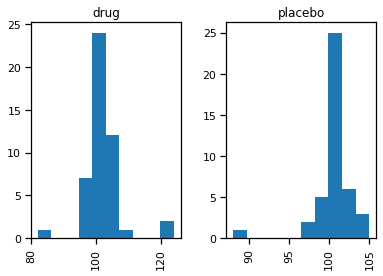

In [3]:
drug = pd.DataFrame(dict(iq=(101,100,102,104,102,97,105,105,98,101,100,123,105,103,100,95,102,106,
        109,102,82,102,100,102,102,101,102,102,103,103,97,97,103,101,97,104,
        96,103,124,101,101,100,101,101,104,100,101),
                         group='drug'))
placebo = pd.DataFrame(dict(iq=(99,101,100,101,102,100,97,101,104,101,102,102,100,105,88,101,100,
           104,100,100,100,101,102,103,97,101,101,100,101,99,101,100,100,
           101,100,99,101,100,102,99,100,99),
                            group='placebo'))

trial_data = pd.concat([drug, placebo], ignore_index=True)
trial_data.hist('iq', by='group')

## Classical Statistical Hypothesis Testing for 2 groups with continuous outcome

In [Statistical hypothesis testing](https://en.wikipedia.org/wiki/Statistical_hypothesis_testing), which is classical statistics for Data Science, you talk about [confidence intervals](https://en.wikipedia.org/wiki/Confidence_interval), the [null hypothesis](https://en.wikipedia.org/wiki/Null_hypothesis) (*nothing new happening*), [false positives and false negatives](https://en.wikipedia.org/wiki/False_positives_and_false_negatives), the [T-test](https://en.wikipedia.org/wiki/Student%27s_t-test), the [chi-squared test](https://en.wikipedia.org/wiki/Chi-squared_test), and [ANOVA](https://en.wikipedia.org/wiki/Analysis_of_variance), among other things.

Bayesian analysis *supersedes* (is better than) statistical hypothesis testing. But there is still a *lot* of statistical hypothesis testing going on, and so it is good to learn something about it.

**statistical hypothesis testing**, also called [confirmatory data analysis](https://en.wikipedia.org/wiki/Statistical_hypothesis_testing) is a framework for determining ***whether observed data deviates from what is expected***. 

A hypothesis is proposed for the statistical relationship between two data sets, and this is compared as an alternative to an idealized `null hypothesis` that proposes ***no relationship between two data sets**. Python's `scipy.stats` library contains an array of functions that make it easy to carry out hypothesis tests. Scipy.. I know, I know..

</br >
<center>
<img src="https://denniegeorgesloth.weebly.com/uploads/4/0/8/7/40875523/4850818_orig.jpg" width="300" />
Lazy Professor who hasn't officially introduced scipy yet!
</center>


### Statistical Hypothesis Testing in a nutshell

If you wanted to test whether the statistics of the [placebo group](https://en.wikipedia.org/wiki/Clinical_trial#Placebo_groups) is different from the **drug group**, the **null hypothesis** states that ***there is no difference*** (nothing new).

The purpose of a **hypothesis test** is to determine whether the null hypothesis is ***likely to be true*** given sample data. If there is little evidence against the null hypothesis given the data, you **accept** the null hypothesis. If the null hypothesis is unlikely given the data, you might **reject** the null hypothesis in favor of the alternative hypothesis: ***that something interesting/strange is going on***.

Once you have the null and alternative hypothesis in hand, you choose a [significance level](https://en.wikipedia.org/wiki/Statistical_significance) (often denoted by the Greek letter $\alpha$). The significance level is a probability threshold that determines when you ***reject*** the null hypothesis. After carrying out a test, if the probability of getting a result as strange as the one you observe is lower than the significance level, you reject the null hypothesis in favor of the alternative. If the probability is higher than $\alpha$, then the null hypothesis is in effect and the result is ***not strange at all***. 

This probability of seeing a result as strange or more strange than the one observed is known as the [p-value](https://en.wikipedia.org/wiki/P-value). If the **p-value** is high, uncertainty in the experiment is high, and it will be difficult to conclude one way or the other (i.e. there is no difference). If the **p-value** is low, there is low probability to see a strange result, and so if we do see a strange result it is conclusive that the drug and placebo groups follow different distributions and thus that the drug group *has an effect*. 

####  What do I need to know?
The **T-test** is a statistical test, based on the **p-value**, used to determine whether a numeric sampling differs significantly from the population, or whether ***two samples differ from one another***. That, in a nutshell, is traditional statistics for data science! 

### Terminology

A [confidence interval](https://en.wikipedia.org/wiki/Confidence_interval) is a **range** of sample values above and below a point estimate of a parameter (like the `mean`) that captures the true population parameter at some predetermined **confidence level**. 

For example, if you want to have a 95% chance of capturing the *true* population mean, you'd set your confidence level to 95%. Confidence levels are related to the size of your sampling, and the standard deviation of the *true* population.

Sometimes we also say the *confidence level is 95%*.

The [significance level](https://en.wikipedia.org/wiki/Statistical_significance) (denoted by $\alpha$) is 1 - the confidence interval bound. So, a significance level of 0.05 corresponds to a confidence level of 95%. 

You calculate a confidence interval by taking a point estimate of some parameter (e.g. the mean) from a sample with size $n$, for example using MOM or MLE methods, and then adding and subtracting a [margin of error](https://en.wikipedia.org/wiki/Margin_of_error) to create a **range**. **Margin of error** is based on your desired confidence level, the spread of the population, and the size of your sample. 

This comes from the ***desire to obtain some kind of probability estimate on point estimates of model parameters***.

The way you calculate the margin of error depends on whether you know the spread of the population or not. If you know the standard deviation $\sigma$ of the population (a measure of spread), the margin of error is equal to:

$$ z ∗ \frac{\sigma}{\sqrt{n}}$$

Where $z$ is a number known as the [z-critical value](https://en.wikipedia.org/wiki/Z-test). The **z-critical value** is the *number* of standard deviations you'd have to go from the mean of the distribution to capture the proportion of the data associated with the desired confidence level. 

For instance, we know that roughly 95% of the data in a *normal* (gaussian) distribution lies within 2 standard deviations of the mean, so we use 2 as the `z-critical value` for a 95% confidence interval. For all other distributions, you use the quantile function `stats.t.ppf` to compute $z$.


### T-test for comparing drug/placebo IQ outcomes

[scipy.stats.ttest_ind](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ttest_ind.html) is
a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that ***the populations have identical variances***.

The **T-test** measures whether the average (expected) value differs significantly across samples. If we observe a **large** p-value, for example larger than 0.1, then we cannot reject the null hypothesis of identical average scores, we have to say *there is nothing strange going on*. If the p-value is **smaller than the threshold**, then we reject the null hypothesis of equal averages (*there is something interesting going on*).

Note that this test works on averages (expected) values, and that a **point estimate** does *not* capture the richness of all available statistics. In fact, it often returns bad results, *such as for this drug/placebo dataset*!

Let's do the estimation for our chosen dataset.

In [4]:
import scipy.stats as stats
combined_iq = np.concatenate((drug.iq, placebo.iq))
print(len(drug.iq))
print(len(placebo.iq))
print( drug.iq.mean() )
print( placebo.iq.mean() )
print( combined_iq.mean() )
stats.ttest_ind(a= drug.iq,
                b= placebo.iq,
                equal_var=False) 

47
42
101.91489361702128
100.35714285714286
101.17977528089888


Ttest_indResult(statistic=1.622190457290228, pvalue=0.10975381983712831)

The test yields a p-value of 0.10975, which means ***there is a 11% chance we'd see sample data this far apart statistically if the two groups tested are actually identical***. 

If we were using a 95% confidence level, we would **fail** to reject the null hypothesis, since the p-value is greater than the corresponding significance level of 0.05. And so we conclude that the drug is as effective as placebo at a 95% confidence level: there is nothing interesting going on. At a significance level of 0.05, drug outcome on IQ is statistically **nonsignificant**.

The test result shows the test statistic is equal to 1.622. This test statistic tells us how much the sampled mean deviates from the null hypothesis. If the t-statistic lies outside the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom, we need to reject the null hypothesis. We get the quantiles of the [Student-T](https://en.wikipedia.org/wiki/Student%27s_t-distribution) distribution using `stats.t.ppf`.


In [5]:
stats.t.ppf(q=0.05,  # Quantile to check
            df=42)  # Degrees of freedom

-1.6819523559426006

Here we see that our test statistic of 1.62 is ***within the quantile of the t-distribution (1.68)***, so we should accept the null hypothesis.

When we do Bayesian analysis on the same dataset, we will see different results than classical hypothesis testing! 

I ***do not like*** classical hypothesis testing! The math is shaky, and results are dubious! But if you interview for a big pharma company that still does classical statistical inference, maybe you don't say this to them *before they hire you*.

## References and Resources

- Goodman, S. N. (1999). Toward evidence-based medical statistics. 1: The P value fallacy. Annals of Internal Medicine, 130(12), 995–1004. http://doi.org/10.7326/0003-4819-130-12-199906150-00008
- Johnson, D. (1999). The insignificance of statistical significance testing. Journal of Wildlife Management, 63(3), 763–772.
- Gelman, A., Carlin, J. B., Stern, H. S., Dunson, D. B., Vehtari, A., & Rubin, D. B. (2013). Bayesian Data Analysis, Third Edition. CRC Press.
-  Norvig, Peter. 2009. [The Unreasonable Effectiveness of Data](http://static.googleusercontent.com/media/research.google.com/en//pubs/archive/35179.pdf).
- Salvatier, J, Wiecki TV, and Fonnesbeck C. (2016) Probabilistic programming in Python using PyMC3. *PeerJ Computer Science* 2:e55 <https://doi.org/10.7717/peerj-cs.55>
- Cronin, Beau. "Why Probabilistic Programming Matters." 24 Mar 2013. Google, Online Posting to Google . Web. 24 Mar. 2013. <https://plus.google.com/u/0/107971134877020469960/posts/KpeRdJKR6Z1>.